## Asymptotic Density

In [ ]:
from sympy import isprime

# Function to calculate the prime-counting function π(x)
def prime_count(x):
    count = 0
    for n in range(2, x + 1):  # Check all numbers from 2 to x
        if isprime(n):         # If n is prime, increase the count
            count += 1
    return count

# Calculate asymptotic density for primes up to a given x
def asymptotic_density(x):
    pi_x = prime_count(x)     # Count of primes up to x
    density = pi_x / x        # π(x) / x gives the asymptotic density
    return density

# Example for x = 100
x = 100
density = asymptotic_density(x)
print(f"Asymptotic density of primes up to {x}: {density:.4f}")

Asymptotic density of primes up to 100: 0.2500


## Plotting Asymptotic Density of Prime Pairs

In [ ]:
# Function to compute the asymptotic density of primes for twin, cousin, and sexy primes
def asymptotic_density_special_primes(max_x, n_primes):
    x_values = np.arange(2, max_x, 10)  # Range of x values
    density_values_twin = []
    density_values_cousin = []
    density_values_sexy = []
    density_values_eight = []
    density_values_ten = []
    density_values_twelve = []

    for x in x_values:
        # Get special primes up to x
        twin_primes = generate_special_primes(n_primes, 2)
        cousin_primes = generate_special_primes(n_primes, 4)
        sexy_primes = generate_special_primes(n_primes, 6)
        eight_primes = generate_special_primes(n_primes, 8)
        ten_primes = generate_special_primes(n_primes, 10)
        twelve_primes = generate_special_primes(n_primes, 12)

        # Count the number of special primes less than x
        twin_count = sum(1 for p in twin_primes if p <= x)
        cousin_count = sum(1 for p in cousin_primes if p <= x)
        sexy_count = sum(1 for p in sexy_primes if p <= x)
        eight_count = sum(1 for p in eight_primes if p <= x)
        ten_count = sum(1 for p in ten_primes if p <= x)
        twelve_count = sum(1 for p in twelve_primes if p <= x)

        # Compute asymptotic densities
        density_twin = twin_count / x
        density_cousin = cousin_count / x
        density_sexy = sexy_count / x
        density_eight = eight_count / x
        density_ten = ten_count / x
        density_twelve = twelve_count / x

        density_values_twin.append(density_twin)
        density_values_cousin.append(density_cousin)
        density_values_sexy.append(density_sexy)
        density_values_eight.append(density_eight)
        density_values_ten.append(density_ten)
        density_values_twelve.append(density_twelve)

    return x_values, density_values_twin, density_values_cousin, density_values_sexy, density_values_eight, density_values_ten, density_values_twelve

In [ ]:
# Function to generate special primes (twin, cousin, sexy primes)
# Note that this function only returns the *first* prime that fits the description
#   ex: (11, 13) is a pair of twin primes, only 11 would be added to the list

def generate_special_primes(n, gap):
    special_primes = []
    p = 2
    while len(special_primes) < n:
        if isprime(p) and isprime(p + gap):
            special_primes.append(p)
        p += 1
    return special_primes

print(generate_special_primes(100, 2))

[3, 5, 11, 17, 29, 41, 59, 71, 101, 107, 137, 149, 179, 191, 197, 227, 239, 269, 281, 311, 347, 419, 431, 461, 521, 569, 599, 617, 641, 659, 809, 821, 827, 857, 881, 1019, 1031, 1049, 1061, 1091, 1151, 1229, 1277, 1289, 1301, 1319, 1427, 1451, 1481, 1487, 1607, 1619, 1667, 1697, 1721, 1787, 1871, 1877, 1931, 1949, 1997, 2027, 2081, 2087, 2111, 2129, 2141, 2237, 2267, 2309, 2339, 2381, 2549, 2591, 2657, 2687, 2711, 2729, 2789, 2801, 2969, 2999, 3119, 3167, 3251, 3257, 3299, 3329, 3359, 3371, 3389, 3461, 3467, 3527, 3539, 3557, 3581, 3671, 3767, 3821]


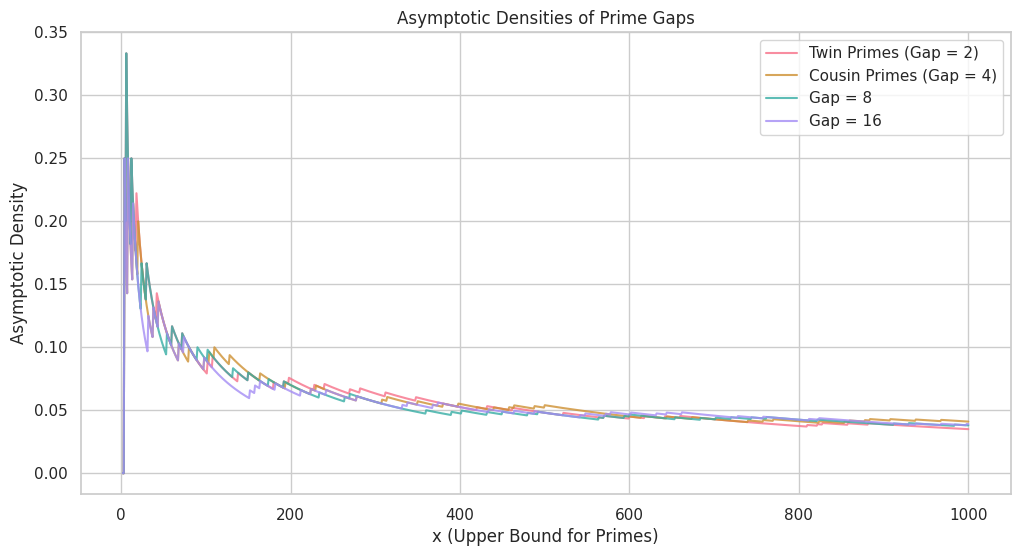

In [ ]:
import seaborn as sns
import sympy
import matplotlib.pyplot as plt

def prime_gaps_with_gap(limit, gap):
    primes = list(sympy.primerange(2, limit))
    gap_primes = [(p, p + gap) for p in primes if sympy.isprime(p + gap)]
    return gap_primes

def asymptotic_density(prime_gap_counts, limit):
    return prime_gap_counts / limit

def plot_asymptotic_densities(limit):
    sns.set(style="whitegrid")
    palette = sns.color_palette("husl", 8)

    x_values = range(2, limit + 1)
    twin_densities = []
    cousin_densities = []
    gap_8_densities = []
    gap_16_densities = []

    for x in x_values:
        twin_densities.append(asymptotic_density(len(prime_gaps_with_gap(x, 2)), x))
        cousin_densities.append(asymptotic_density(len(prime_gaps_with_gap(x, 4)), x))
        gap_8_densities.append(asymptotic_density(len(prime_gaps_with_gap(x, 8)), x))
        gap_16_densities.append(asymptotic_density(len(prime_gaps_with_gap(x, 16)), x))

    plt.figure(figsize=(12, 6))
    plt.plot(x_values, twin_densities, label="Twin Primes (Gap = 2)", color=palette[0], alpha=0.8)
    plt.plot(x_values, cousin_densities, label="Cousin Primes (Gap = 4)", color=palette[1], alpha=0.8)
    plt.plot(x_values, gap_8_densities, label="Gap = 8", color=palette[4], alpha=0.8)
    plt.plot(x_values, gap_16_densities, label="Gap = 16", color=palette[6], alpha=0.8)


    plt.xlabel("x (Upper Bound for Primes)")
    plt.ylabel("Asymptotic Density")
    plt.title("Asymptotic Densities of Prime Gaps")
    plt.grid(True)
    plt.legend()
    plt.show()

# Parameters
limit = 1000  # Limit for prime generation

# Generate and plot the densities
plot_asymptotic_densities(limit)


## Visualizing the Hardy-Littlewood Conjecture



In [ ]:
# Can we cycle through the palette?

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import imageio
import os

def calculate_valid_positions(prime, gap):
    valid_positions = []
    for i in range(prime):
        if (i % prime != 0) and ((i + gap) % prime != 0):
            valid_positions.append(i)
    return valid_positions



def plot_valid_positions(prime, twin_color, cousin_color):
    # Set up the figure with adjusted width to prevent cut-off
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))


    # Calculate positions
    twin_positions = calculate_valid_positions(prime, 2)
    cousin_positions = calculate_valid_positions(prime, 4)

    # Create position arrays
    angles = np.linspace(np.pi / 2, -1.5 * np.pi, prime, endpoint=False)

    # Plot for twin primes
    ax1.set_title(f'Twin Primes mod {prime} \n', pad=25, fontsize=14, color=twin_color)
    for i in range(prime):
        color = twin_color if i in twin_positions else 'lightgray'
        ax1.plot(np.cos(angles[i]), np.sin(angles[i]), 'o', color=color, markersize=20)
        ax1.text(1.15 * np.cos(angles[i]), 1.15 * np.sin(angles[i]), str(i),
         ha='center', va='center', fontsize=12, color='black')


    ax1.set_aspect('equal')
    ax1.axis('off')

    # Plot for cousin primes
    ax2.set_title(f'Cousin Primes mod {prime}\n', pad=25, fontsize=14, color=cousin_color)
    for i in range(prime):
        color = cousin_color if i in cousin_positions else 'lightgray'
        ax2.plot(1.05 * np.cos(angles[i]), 1.05 * np.sin(angles[i]), 'o', color=color, markersize=20)
        ax2.text(1.15 * np.cos(angles[i]), 1.15 * np.sin(angles[i]), str(i),
         ha='center', va='center', fontsize=12, color='black')

    ax2.set_aspect('equal')
    ax2.axis('off')

    # Add a main title for the figure
    fig.suptitle(f'Valid Positions', fontsize=16, y=0.97)

    # Adjust layout to prevent overlap and cutoff
    plt.tight_layout()
    plt.subplots_adjust(top=0.90, wspace=0.4)

    return fig

# List of primes
primes = [3, 5, 7, 11, 13]

# Get a color palette that cycles through unique colors
palette = sns.color_palette("husl", len(primes))

# Create a list to store filenames of the frames
filenames = []

# Generate plots for each prime and save them as images
for idx, prime in enumerate(primes):
    twin_color = palette[idx % len(palette)]  # Cycle through colors
    cousin_color = palette[(idx + 1) % len(palette)]  # Use next color in sequence

    fig = plot_valid_positions(prime, twin_color, cousin_color)
    filename = f'prime_{prime}.png'
    fig.savefig(filename, bbox_inches='tight', pad_inches=1)  # Fixes clipping
    filenames.append(filename)
    plt.close(fig)

# Create a GIF from the saved images
with imageio.get_writer('prime_gaps.gif', mode='I', duration=1200, loop=0) as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

# Clean up the individual frame files
for filename in filenames:
    os.remove(filename)

print("GIF created successfully!")


<ipython-input-3-eaf44ed9434f>:87: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


GIF created successfully!


## The Second Hardy-Littlewood Conjecture


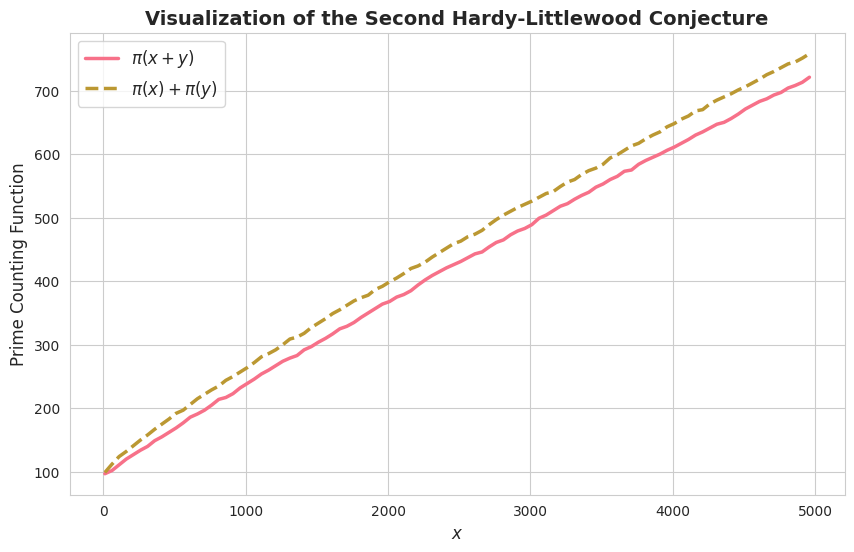

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sympy import primepi

# Use Seaborn's husl palette
sns.set_style("whitegrid")
sns.set_palette("husl")

# Generate values for x
x_values = np.arange(10, 5000, 50)  # Test x values up to 5000
y = 500  # Fix y for visualization

# Convert sympy outputs to integers
pi_x_plus_y = np.array([int(primepi(x + y)) for x in x_values])
pi_x_plus_pi_y = np.array([int(primepi(x)) + int(primepi(y)) for x in x_values])

# Create the plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=x_values, y=pi_x_plus_y, label=r'$\pi(x+y)$', linewidth=2.5)
sns.lineplot(x=x_values, y=pi_x_plus_pi_y, label=r'$\pi(x) + \pi(y)$', linewidth=2.5, linestyle='dashed')

# Labels and legend
plt.xlabel(r'$x$', fontsize=12)
plt.ylabel('Prime Counting Function', fontsize=12)
plt.title(r'Visualization of the Second Hardy-Littlewood Conjecture', fontsize=14, fontweight='bold')
plt.legend(fontsize=12)
plt.show()


## Computing the Correction Factor

In [19]:
import math
from sympy import primerange

# Define the function to compute the twin prime constant C_2 iteratively using logarithms
def compute_C2_logarithmic(limit):
    primes = primerange(5, limit)  # Start at 5 to avoid log(0) and negative values
    log_product = 0.0  # Store the sum of logarithms

    for p in primes:
        factor = 1 - 1 / (p - 2)**2
        if factor > 0:
            log_product += math.log(factor)

    return math.exp(log_product)

# Set the upper limit for the range of primes (higher limit improves precision)
limit = 10000000  # Increase the limit for a more accurate result
C2 = compute_C2_logarithmic(limit)

print(f"Estimated C_2 (twin prime constant) for limit {limit}: {C2}")


Estimated C_2 (twin prime constant) for limit 10000000: 0.8198024513676222
